In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def command_freq(t_DC, step, rst, target_freq, proc_interval):

    time = np.arange(0, t_DC+36000*target_freq/(step/rst)+60*60*2, proc_interval, dtype=np.float32)
    freq = np.zeros(int((t_DC+36000*target_freq/(step/rst)+60*60*2)*(1/proc_interval)), dtype=np.float32)

    # Refactoring suggestions
    # 1. Use numpy's vectorized operations instead of loops for better performance.
    # eg. precomupte the indices and use numpy's advanced indexing
    # n_dc       = int(np.round(t_dc / sample_dt))
    # freq[:n_dc] = 0.0

    n_DC = int(np.round(t_DC/proc_interval))  #DCの速度指令値=0rps
    freq[:n_DC] = 0.0

    n_rst = int(np.round(rst/proc_interval))  #加速中の速度指令値
    freq[n_DC: int(n_DC+n_rst*(36000*target_freq/step))] = [target_freq/36000*step*(i+1) for i in range(int(np.round(36000*target_freq/step))) 
                                                            for j in freq[int(n_DC+i*n_rst): int(n_DC+(i+1)*n_rst)]]
    #for i in range(int(np.round(36000*target_freq/step))):
    #    freq[int(n_DC+i*n_rst): int(n_DC+(i+1)*n_rst)] = target_freq/36000*step*(i+1)

    n_stable = int(np.round(60*60*2/proc_interval))  #Stableの速度指令値
    freq[int(n_DC+n_rst*(36000*target_freq/step)):] = target_freq

    return time, freq

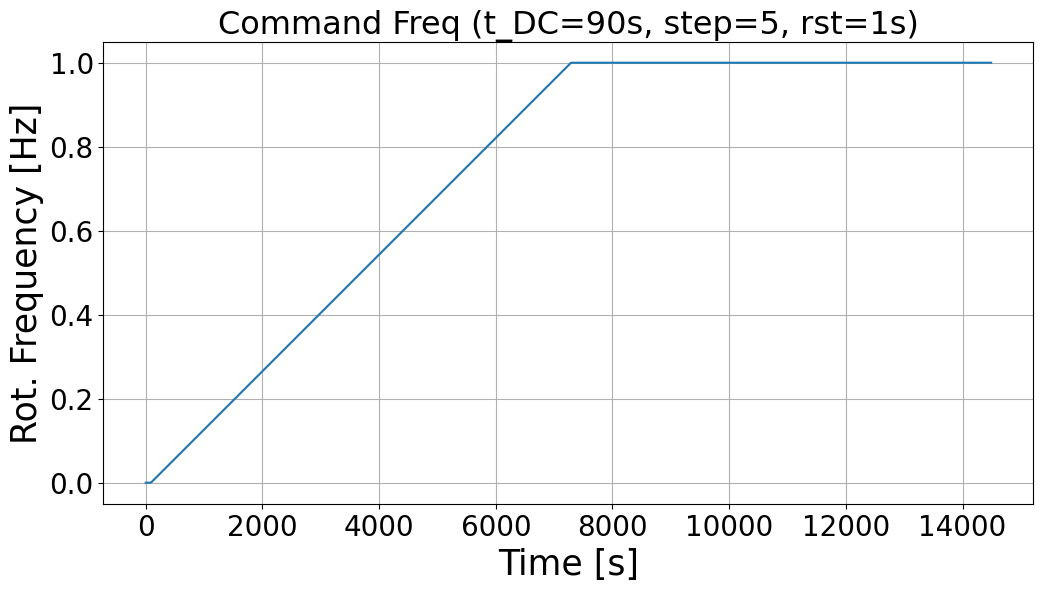

In [24]:
time = command_freq(90, 5, 1, 1, 0.125)[0]
freq = command_freq(90, 5, 1, 1, 0.125)[1]

fig = plt.figure(figsize = (12,6))

plt.plot(time, freq, label='Command Freq [rps]')

plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
#plt.xlim(0,100)
#plt.ylim(0,0.9)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()

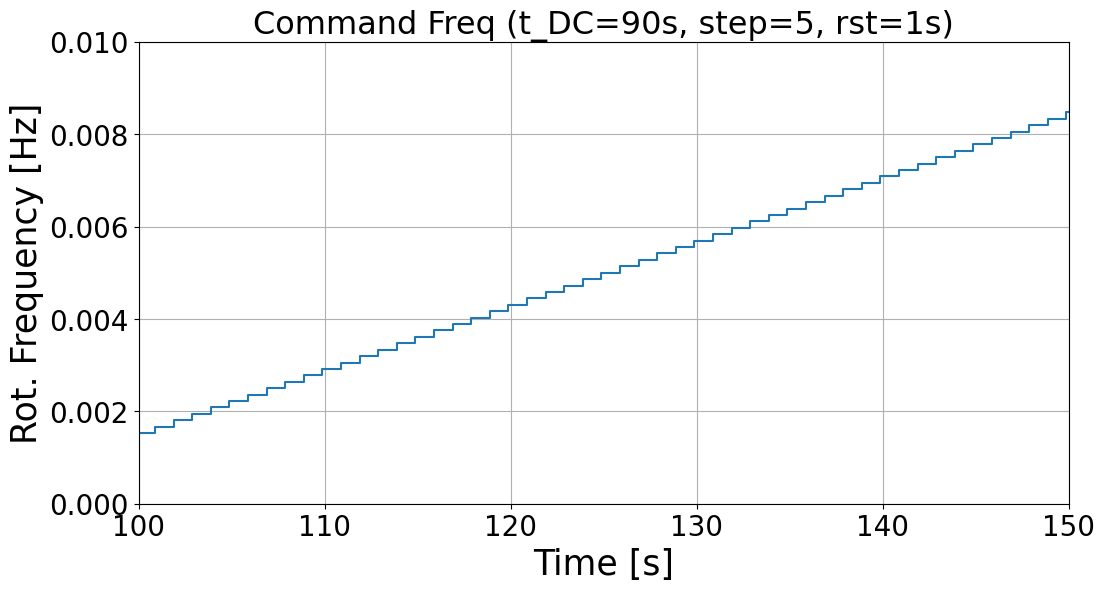

In [25]:
time = command_freq(90, 5, 1, 1, 0.125)[0]
freq = command_freq(90, 5, 1, 1, 0.125)[1]

fig = plt.figure(figsize = (12,6))

plt.step(time, freq, label='Command Freq [rps]')

plt.title('Command Freq (t_DC=90s, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
plt.xlim(100,150)
plt.ylim(0,0.01)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()